# **Scripts for Identifying Communication Style through YouTube Comments**

In [ ]:
!pip install spacy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python -m spacy download en_core_web_sm

2022-08-07 05:39:59.138581: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 2.9 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy
import en_core_web_sm
import pandas as pd
import seaborn as sns
import numpy as np
import re
import random
from google.colab import drive 
#you can use google drive file with this command. This execution will let you access your csv file in our AI Project folder

# **Load Dataset**

In [ ]:
drive.mount('/content/drive')
#Once you run this script it will prompt you to link to your google account. 
#When your google account is linked with collab, you can view the folders on the left panel of the screen
#copy the path of your csv file for the next step

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/AI_Project/Data/Edited_0408_Survey_Responses.csv')

In [ ]:
train_data

,Age_Group,Personality_Concat,Profile_Type,Personae,Know_YTber,Buy_phone,Comments
0,50 and above,aadbdadaaa,D,iJustine,Yes,No,"Her reviews mostly positive. Not credible, so..."
1,40 to 49,bbbbbbbbbb,I,iJustine,No,Yes,the macro mode and video of the new iPhone13 i...
2,30 to 39,bdaccccddc,S,iJustine,Yes,No,I feel that she is overselling the iphone as s...
3,30 to 39,acacbaaddd,D,iJustine,Yes,Yes,Love the in-depth dive into the cameras for th...
4,50 and above,abbccdbaac,I,iJustine,No,No,Focused on the camera. I believe there are pho...
...,...,...,...,...,...,...,...
195,30 to 39,ccbadddaac,S,Marques,No,Yes,too technical and not enough demonstrations
196,40 to 49,cdbddcdcbd,C,Marques,No,Yes,Very good review. Talk about the good and the...
197,30 to 39,dbaccbddcc,S,Marques,No,No,Alot of information about the specs.. just mun...
198,30 to 39,dcbbbbdddc,C,Marques,No,Yes,Quite a well rounded review of the different t...


# **Visualization of Surveyees**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'No. of Surveyees'), Text(0.5, 0, 'Profile Type')]

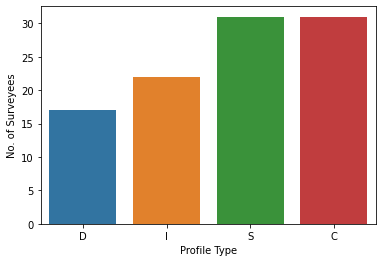

In [ ]:
sns.countplot(train_data.iloc[:101, 2]).set( xlabel = "Profile Type", ylabel = "No. of Surveyees")
#Distribution of DISC profiles from the people who did the survey

In [ ]:
np.unique(train_data['Profile_Type'], return_counts=True)
#listing the array of the Profile_Type column

(array(['C', 'D', 'I', 'S'], dtype=object), array([62, 32, 44, 62]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'No. of Surveyees'), Text(0.5, 0, 'Age Group')]

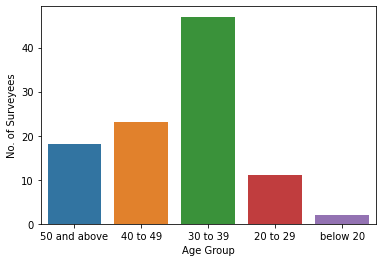

In [ ]:
sns.countplot(train_data.iloc[:101, 0]).set( xlabel = "Age Group", ylabel = "No. of Surveyees")
#Distribution of Age Group from the people who did the survey

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'No. of Surveyees'), Text(0.5, 0, 'Knows iJustine')]

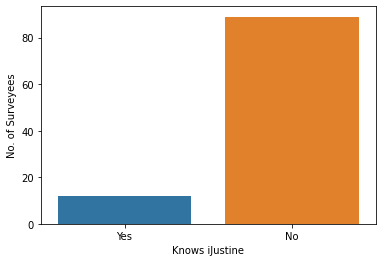

In [ ]:
sns.countplot(train_data.iloc[:101, 4]).set( xlabel = "Knows iJustine", ylabel = "No. of Surveyees")
#Distribution of people who knows iJustine

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'No. of Surveyees'),
 Text(0.5, 0, "Intend to buy after iJustine's review")]

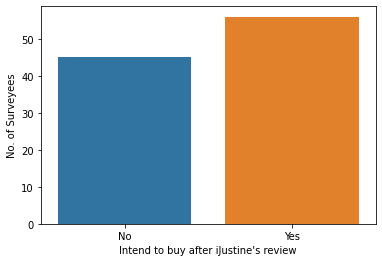

In [ ]:
sns.countplot(train_data.iloc[:101, 5]).set( xlabel = "Intend to buy after iJustine's review", ylabel = "No. of Surveyees")
#Distribution of people who will buy after watching iJustine's iPhone13 review

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'No. of Surveyees'),
 Text(0.5, 0, 'Familiarity vs Purchase Influence - iJustine')]

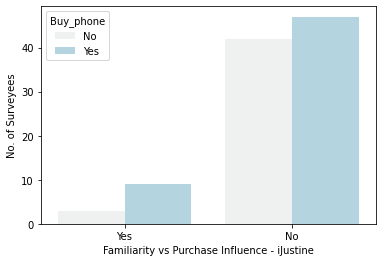

In [ ]:
#know iJustine and after watching will they be more likely to buy iPhone after watching
sns.countplot(train_data.iloc[:101, 4], hue = train_data.iloc[:101, 5], color = 'lightblue').set( xlabel = "Familiarity vs Purchase Influence - iJustine", ylabel = "No. of Surveyees")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'No. of Surveyees'),
 Text(0.5, 0, 'DISC vs Purchase Influence - iJustine')]

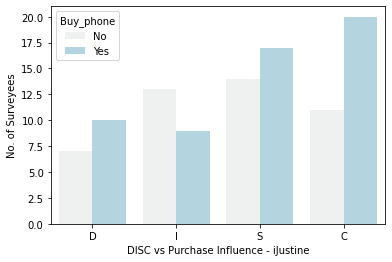

In [ ]:
#DISC to be more likely to buy iPhone after watching
sns.countplot(train_data.iloc[:101, 2], hue = train_data.iloc[:101, 5], color = 'lightblue').set( xlabel = "DISC vs Purchase Influence - iJustine", ylabel = "No. of Surveyees")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'No. of Surveyees'), Text(0.5, 0, 'Knows Marques Brownlee')]

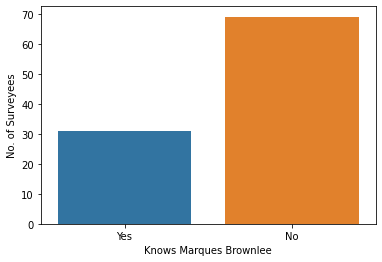

In [ ]:
sns.countplot(train_data.iloc[100:, 4]).set( xlabel = "Knows Marques Brownlee", ylabel = "No. of Surveyees")
#Distribution of people who knows Marques Brownlee

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'No. of Surveyees'),
 Text(0.5, 0, "Intend to buy after Marques' Review")]

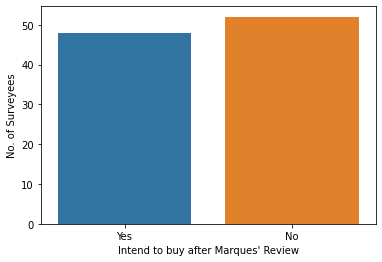

In [ ]:
sns.countplot(train_data.iloc[100:, 5]).set( xlabel = "Intend to buy after Marques' Review", ylabel = "No. of Surveyees")
#Distribution of people who will buy after watching Marques's iPhone13 review

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'No. of Surveyees'),
 Text(0.5, 0, 'Familiarity vs Purchase Influence - Marques')]

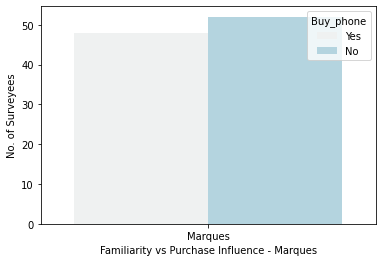

In [ ]:
#know Marques and after watching will they be more likely to buy iPhone after watching
sns.countplot(train_data.iloc[100:, 3], hue = train_data.iloc[100:, 5], color = 'lightblue').set( xlabel = "Familiarity vs Purchase Influence - Marques", ylabel = "No. of Surveyees")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'No. of Surveyees'),
 Text(0.5, 0, 'DISC vs Purchase Influence - Marques')]

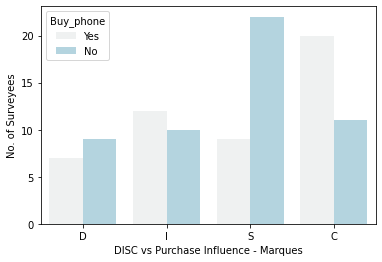

In [ ]:
#DISC to be more likely to buy iPhone after watching
sns.countplot(train_data.iloc[100:, 2], hue = train_data.iloc[100:, 5], color = 'lightblue').set( xlabel = "DISC vs Purchase Influence - Marques", ylabel = "No. of Surveyees")

# **Train Survey Dataset**

In [ ]:
X = train_data.iloc[:, 6].values
#our X (dependent variable) is the comments of the people in the survey
#In this line, note that : means 'all of' and 1 is the column number. Always note that python counts from 0 onwards. 
#depending on how you organise the spreadsheet, you need to count which column number you are using for the Comments feature
X

array(['Her reviews mostly positive.  Not credible, someone script for her?',
       'the macro mode and video of the new iPhone13 is really cool. I am really impressed. Love the music and the video is very well edited. very well made',
       "I feel that she is overselling the iphone as she exaggerates on the plus points of the phone. She didn't mention about the cons of the phone. Could be she is paid or sponsored by Apple. Nevertheless it is still an informative and entertaining video about the phone",
       'Love the in-depth dive into the cameras for the phones, definitely a nice upgrade. ',
       "Focused on the camera. I believe there are phones with better cameras. I'm not a fan of apple",
       'Interesting, fun to watch, and insightful, but very long',
       'Wow!!! Iphone 13 Pro Max features are super upgrade! Thank you for the detailed review!',
       'Great shots.', 'Don’t exaggerate',
       'Succinctly describes the main differences between iPhone 12 Pro Max and iP

In [ ]:
y = train_data.iloc[:, 2].values
#y is our DISC column. This time you may need to change 0 to the actual number of the column
y

array(['D', 'I', 'S', 'D', 'I', 'C', 'S', 'I', 'C', 'C', 'C', 'I', 'I',
       'S', 'C', 'C', 'S', 'S', 'I', 'I', 'S', 'I', 'S', 'S', 'C', 'S',
       'I', 'S', 'D', 'D', 'C', 'C', 'D', 'C', 'D', 'S', 'I', 'C', 'C',
       'C', 'I', 'D', 'C', 'I', 'D', 'S', 'C', 'D', 'D', 'D', 'S', 'S',
       'C', 'D', 'D', 'I', 'I', 'C', 'I', 'D', 'C', 'S', 'S', 'S', 'I',
       'C', 'I', 'S', 'D', 'C', 'S', 'C', 'S', 'S', 'S', 'I', 'C', 'C',
       'S', 'I', 'S', 'S', 'C', 'I', 'S', 'D', 'S', 'S', 'C', 'I', 'S',
       'C', 'C', 'C', 'C', 'S', 'C', 'S', 'C', 'I', 'D', 'I', 'S', 'D',
       'I', 'C', 'S', 'I', 'C', 'C', 'C', 'I', 'I', 'S', 'C', 'C', 'S',
       'S', 'I', 'I', 'S', 'I', 'S', 'S', 'C', 'S', 'I', 'S', 'D', 'D',
       'C', 'C', 'D', 'C', 'D', 'S', 'I', 'C', 'C', 'C', 'I', 'D', 'C',
       'I', 'D', 'S', 'C', 'D', 'D', 'D', 'S', 'S', 'C', 'D', 'D', 'I',
       'I', 'C', 'I', 'D', 'C', 'S', 'S', 'S', 'I', 'C', 'I', 'S', 'D',
       'C', 'S', 'C', 'S', 'S', 'S', 'I', 'C', 'C', 'S', 'I', 'S

In [ ]:
from sklearn.model_selection import train_test_split
X, _, y, _ = train_test_split(X, y, test_size = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = None)

In [ ]:
X_train.shape, y_train.shape

((149,), (149,))

In [ ]:
X_test.shape, y_test.shape

((50,), (50,))

In [ ]:
np.unique(y_train, return_counts=True)
#check the number of train sets

(array(['C', 'D', 'I', 'S'], dtype=object), array([46, 25, 29, 49]))

In [ ]:
np.unique(y_test, return_counts=True)
#check the number of test set

(array(['C', 'D', 'I', 'S'], dtype=object), array([16,  7, 14, 13]))

# **Pre-Process Data**

In [ ]:
#load the english language
nlp = spacy.load('en_core_web_sm')
nlp

In [ ]:
def preprocessing(sentence):
  sentence = sentence.lower()
  sentence = re.sub(r"iphone", ' ', sentence) #remove the word iphone
  sentence = re.sub(r"camera", ' ', sentence) #remove camera
  sentence = re.sub(r"photo", ' ', sentence) #remove photo
  sentence = re.sub(r"phone", ' ', sentence) #remove phone
  sentence = re.sub(r"phones", ' ', sentence) #remove phones
  sentence = re.sub(r"max", ' ', sentence) #remove max
  sentence = re.sub(r"pro", ' ', sentence) #remove pro
#note that you can repeat the above lines to remove some of the words you don't want to process.
#these are the additional stop words other than the ones in the stop word library

  sentence = sentence.replace('.', '')
  tokens = []
  tokens = [token.text for token in nlp(sentence) if not (token.is_stop or token.like_num or token.is_punct or token.is_space or len(token) == 1)]
  tokens = ' '.join([element for element in tokens])

  return tokens

In [ ]:
X_train_cleaned = [preprocessing(comment) for comment in X_train]

X_test_cleaned = [preprocessing(comment) for comment in X_test]

print(X_train_cleaned)
print(X_test_cleaned)

['lot talking compared video lot indoor filming makes feel like attending lecture sales talk little background music like video little comparisons liked', 'advertising paid sponsor video', 'video long good use colours content informative sharing differences', 'watch', 'high tech use feature', 'lot information information kind lose attention nt need lot features mentioned fast forward features interested', 'cool', 'fantastic review sure help decision making', 'music good trying hard convincr', 'technical demonstrations', 'thanks marques reviews clear good tips thank', 'use work features got new feature', 'correlation random stuffs video content', 'matter think practical spend money', 'like content great video fun watch', 'informative repetitiveness focus skip till end', 'super thorough review definitely know geeks wanna know appreciate live examples honest additional features like great tips', 'video vides insight details slight touch humour morr engaging', 'extremely detailed', 'liked 

In [ ]:
for _ in range(10):
  print(X_train_cleaned[random.randint(0, len(X_train_cleaned) - 1)])
  #this should display the cleaned comment for analysis

good use keywords pointer forms easy understand succinct point unnecessary shots focuses technical bits pretty convinced buy
cover aspects device vements
video vides wide spectrum informative learned lot good information convinced
nice honest review
great
earth explanation video personable easy understand
convinced watching lengthy eview
reviews positive credible script
technical boring video features effect like limitations new
motion interesting


In [ ]:
X_test_cleaned = [preprocessing(comment) for comment in X_test]

# **Word Cloud**

In [ ]:
texts = ''
for text in X_train_cleaned:
  texts += ' ' + text

In [ ]:
texts

' lot talking compared video lot indoor filming makes feel like attending lecture sales talk little background music like video little comparisons liked advertising paid sponsor video video long good use colours content informative sharing differences watch high tech use feature lot information information kind lose attention nt need lot features mentioned fast forward features interested cool fantastic review sure help decision making music good trying hard convincr technical demonstrations thanks marques reviews clear good tips thank use work features got new feature correlation random stuffs video content matter think practical spend money like content great video fun watch informative repetitiveness focus skip till end super thorough review definitely know geeks wanna know appreciate live examples honest additional features like great tips video vides insight details slight touch humour morr engaging extremely detailed liked supported points visuals making persuasive mentioned feat

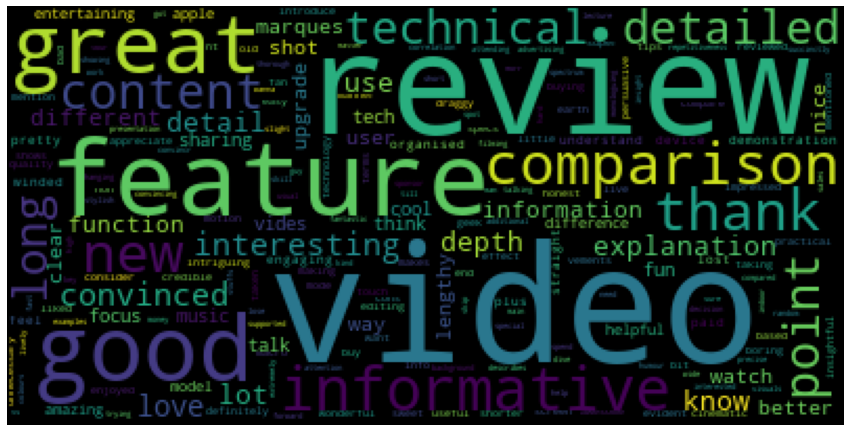

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud()
cloud = cloud.generate(texts)
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off');

# **TF_IDF**
vectorizing the words in iJustine comments

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_cleaned)

X_test_tfidf = vectorizer.fit_transform(X_test_cleaned)

In [ ]:
X_train_tfidf.toarray().shape
X_test_tfidf.toarray().shape

print(X_train_cleaned)
print(X_train_tfidf)

print(X_test)
print(X_test_tfidf)

['lot talking compared video lot indoor filming makes feel like attending lecture sales talk little background music like video little comparisons liked', 'advertising paid sponsor video', 'video long good use colours content informative sharing differences', 'watch', 'high tech use feature', 'lot information information kind lose attention nt need lot features mentioned fast forward features interested', 'cool', 'fantastic review sure help decision making', 'music good trying hard convincr', 'technical demonstrations', 'thanks marques reviews clear good tips thank', 'use work features got new feature', 'correlation random stuffs video content', 'matter think practical spend money', 'like content great video fun watch', 'informative repetitiveness focus skip till end', 'super thorough review definitely know geeks wanna know appreciate live examples honest additional features like great tips', 'video vides insight details slight touch humour morr engaging', 'extremely detailed', 'liked 

In [ ]:
X_train_tfidf.toarray().shape

(149, 395)

In [ ]:
len(vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


165

In [ ]:
def preprocessing_lemma(sentence):
  tokens = []
  tokens = [token.lemma_ for token in nlp(sentence)]
  tokens = ' '.join([element for element in tokens])
  return tokens 

In [ ]:
X_train_cleaned_lemma = [preprocessing_lemma(comment) for comment in X_train_cleaned]
#this will change all the words of the same root to the same word. example: 'learning', 'learnt', 'learn' will all be converted to root word 'learn'

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_cleaned_lemma)

In [ ]:
X_train_tfidf.shape

print(X_train_cleaned_lemma)
print(X_train_tfidf)

['lot talk compare video lot indoor filming make feel like attend lecture sale talk little background music like video little comparison like', 'advertising pay sponsor video', 'video long good use colours content informative sharing difference', 'watch', 'high tech use feature', 'lot information information kind lose attention not need lot feature mention fast forward feature interested', 'cool', 'fantastic review sure help decision make', 'music good try hard convincr', 'technical demonstration', 'thank marques review clear good tip thank', 'use work feature get new feature', 'correlation random stuff video content', 'matter think practical spend money', 'like content great video fun watch', 'informative repetitiveness focus skip till end', 'super thorough review definitely know geeks wanna know appreciate live example honest additional feature like great tip', 'video vide insight detail slight touch humour morr engage', 'extremely detailed', 'like support point visual make persuasiv

In [ ]:
X_test_cleaned_lemma = [preprocessing_lemma(tweet) for tweet in X_test_cleaned]

In [ ]:
X_test_tfidf = vectorizer.transform(X_test_cleaned_lemma)

In [ ]:
X_test_tfidf.shape

(50, 350)

# **Test Models**

### **1. Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

In [ ]:
predictions = classifier.predict(X_test_tfidf)

In [ ]:
predictions

array(['S', 'C', 'S', 'I', 'S', 'S', 'C', 'C', 'S', 'S', 'I', 'S', 'I',
       'S', 'S', 'S', 'C', 'S', 'C', 'D', 'S', 'C', 'C', 'I', 'I', 'S',
       'C', 'S', 'I', 'I', 'C', 'C', 'S', 'C', 'C', 'S', 'D', 'D', 'S',
       'C', 'I', 'S', 'S', 'C', 'S', 'D', 'S', 'S', 'C', 'S'],
      dtype=object)

In [ ]:
y_test

array(['I', 'C', 'I', 'I', 'C', 'C', 'I', 'C', 'D', 'D', 'S', 'S', 'I',
       'C', 'C', 'S', 'C', 'D', 'S', 'I', 'I', 'S', 'C', 'C', 'I', 'S',
       'S', 'S', 'I', 'I', 'S', 'I', 'C', 'C', 'D', 'I', 'I', 'S', 'S',
       'S', 'C', 'C', 'C', 'C', 'D', 'D', 'S', 'D', 'C', 'I'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
accuracy_score(y_test, predictions)

0.38

In [ ]:
cm = confusion_matrix(y_test, predictions)
cm

array([[7, 0, 2, 7],
       [1, 1, 0, 5],
       [2, 2, 5, 5],
       [5, 1, 1, 6]])

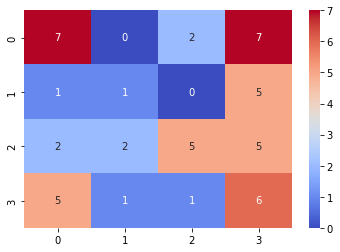

In [ ]:
sns.heatmap(cm, annot=True, cmap='coolwarm')

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           C       0.47      0.44      0.45        16
           D       0.25      0.14      0.18         7
           I       0.62      0.36      0.45        14
           S       0.26      0.46      0.33        13

    accuracy                           0.38        50
   macro avg       0.40      0.35      0.36        50
weighted avg       0.43      0.38      0.38        50



### **2. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)

clf.fit(X_train_tfidf, y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [ ]:
preds = clf.predict(X_test_tfidf)

In [ ]:
cm = confusion_matrix(y_test, preds)
cm

array([[ 3,  1,  1, 11],
       [ 0,  2,  0,  5],
       [ 4,  3,  6,  1],
       [ 2,  1,  1,  9]])

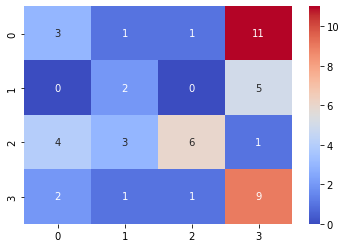

In [ ]:
sns.heatmap(cm, annot=True, cmap='coolwarm')

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           C       0.33      0.19      0.24        16
           D       0.29      0.29      0.29         7
           I       0.75      0.43      0.55        14
           S       0.35      0.69      0.46        13

    accuracy                           0.40        50
   macro avg       0.43      0.40      0.38        50
weighted avg       0.45      0.40      0.39        50



In [ ]:
accuracy_score(y_test, preds)

0.4

### **3. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train_tfidf,y_train)

y_pred=logreg.predict(X_test_tfidf)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  1,  1,  4],
       [ 2,  1,  0,  4],
       [ 7,  1,  3,  3],
       [ 4,  0,  1,  8]])

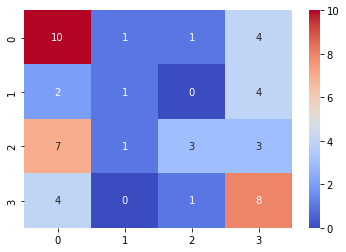

In [ ]:
sns.heatmap(cm, annot=True, cmap='coolwarm')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           C       0.43      0.62      0.51        16
           D       0.33      0.14      0.20         7
           I       0.60      0.21      0.32        14
           S       0.42      0.62      0.50        13

    accuracy                           0.44        50
   macro avg       0.45      0.40      0.38        50
weighted avg       0.46      0.44      0.41        50



In [ ]:
accuracy_score(y_test, y_pred)

0.44

### **4. SVM**

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC()

In [ ]:
clf.fit(X_train_tfidf, y_train)

SVC()

In [ ]:
y_predict=clf.predict(X_test_tfidf)

In [ ]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[10,  0,  0,  6],
       [ 2,  1,  0,  4],
       [ 7,  1,  2,  4],
       [ 2,  0,  0, 11]])

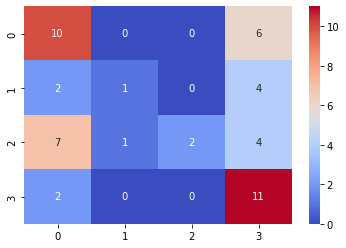

In [ ]:
sns.heatmap(cm, annot=True, cmap='coolwarm')

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           C       0.48      0.62      0.54        16
           D       0.50      0.14      0.22         7
           I       1.00      0.14      0.25        14
           S       0.44      0.85      0.58        13

    accuracy                           0.48        50
   macro avg       0.60      0.44      0.40        50
weighted avg       0.62      0.48      0.42        50



In [ ]:
accuracy_score(y_test, y_predict)

0.48